# <center>SECONDHAND CAR PRICE PREDICTION 

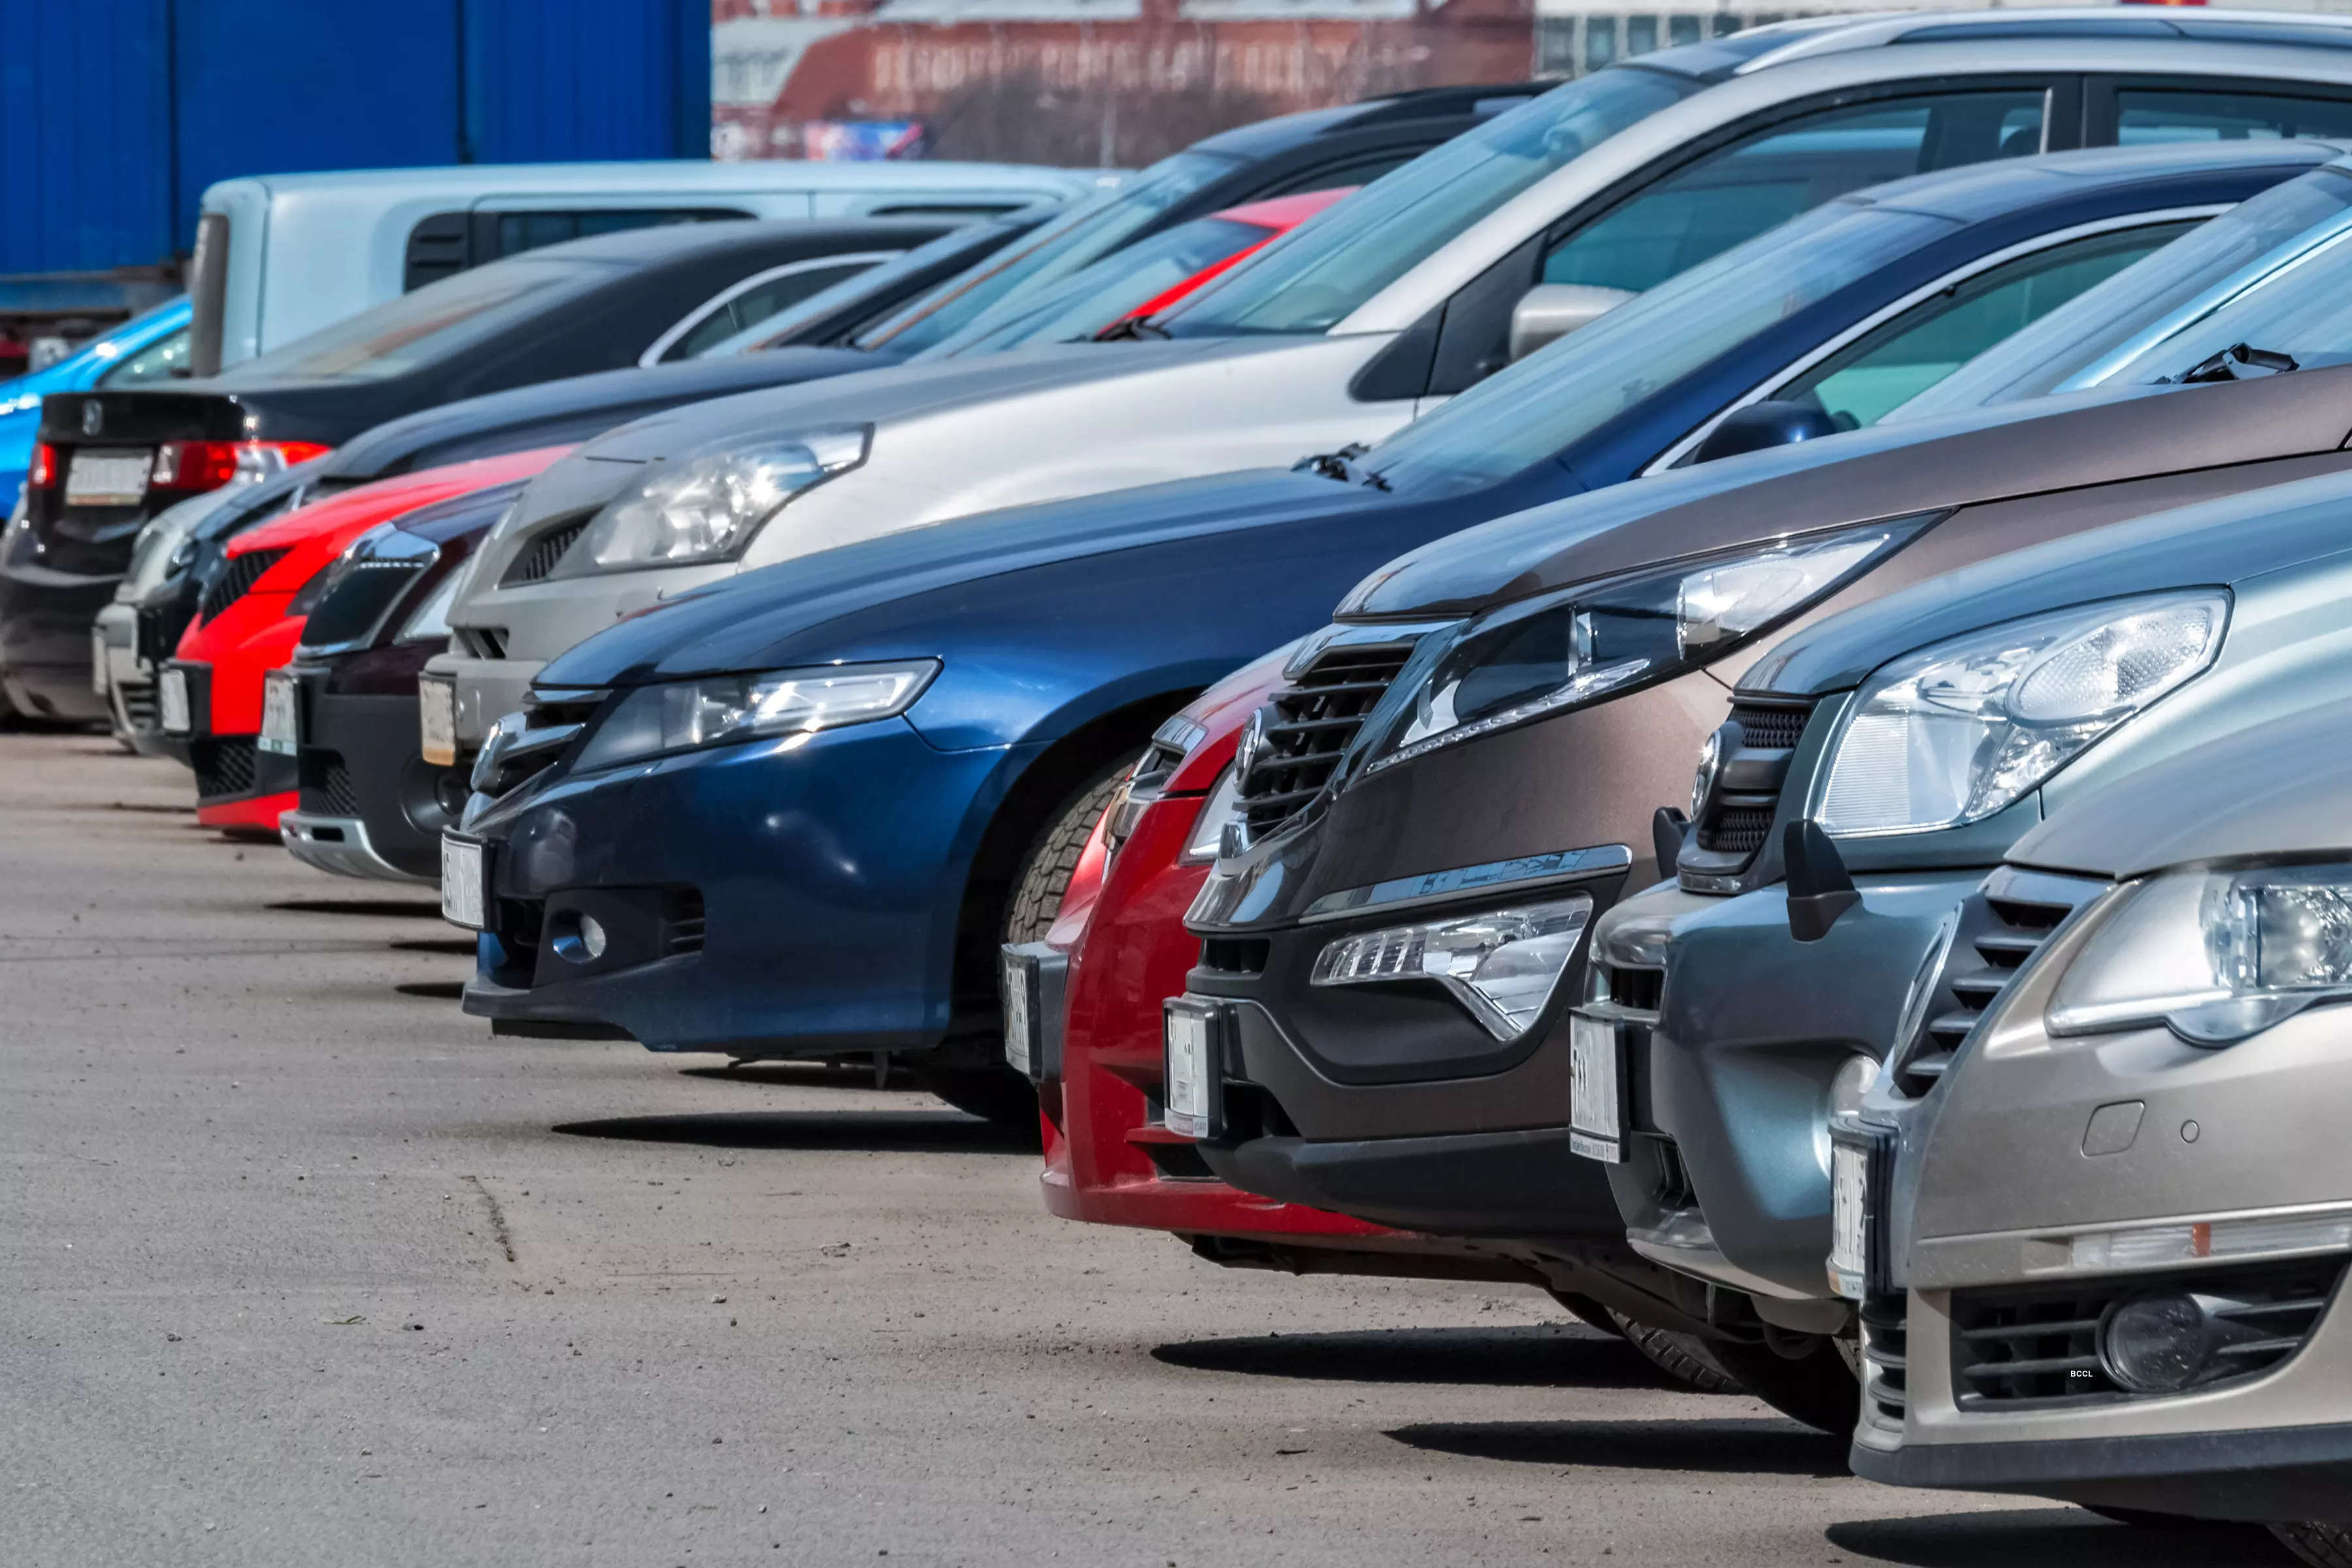

#### In this project we predicting the price of secondhand car on the basis of on road price now, on road price old, KM driven, rating, condition etc.

# USE

This kind of prediction will help sellers estimate price of used cars to give tough competion to other sellers Also it will be usefull for Consumers to verify that they are paying best price for that used car.

## Importing Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

## Importing Dataset

In [2]:
#data=pd.read_csv("C:\\Users\\vishnumukundan\\Downloads\\Telegram Desktop\\secondhand.csv")
data=pd.read_csv("C:\\Users\\USER\\Downloads\\Second_Hand_Car_Price_Prediction-main (2)\\Second_Hand_Car_Price_Prediction-main\\secondhand.csv")
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


#### These are Python modules from the sklearn library that are used for building and evaluating regression models:

In [3]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.svm import LinearSVR

In [4]:
data.sample(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
795,796,656169,764735,4,130980,1,3,12,200,56,93,186388.5
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
102,103,600762,858008,2,118272,4,10,9,152,118,79,307008.0
784,785,551965,834998,4,97132,5,5,10,138,82,88,307770.5
878,879,507549,884178,6,62638,2,6,11,150,53,97,445538.0
146,147,671452,796746,2,55584,4,2,8,179,106,85,512492.0
363,364,609859,884227,2,53573,2,8,13,181,120,72,549406.0
724,725,678535,708816,6,96933,3,1,11,146,120,104,302423.0
412,413,648262,780132,4,147265,5,4,12,181,65,126,126957.5
81,82,548129,863055,2,77250,2,8,15,184,114,101,413288.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


### Finding duplicated values

In [6]:
data.duplicated().sum()

0

# EDA


### % of Ratings for cars

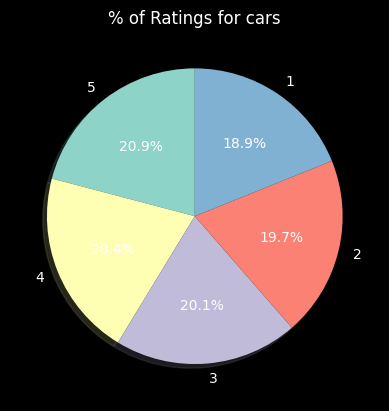

In [30]:
labels=['5','4','3','2','1']
values=data['rating'].value_counts().values
fig1,ax1=plt.subplots()
plt.title("% of Ratings for cars")
ax1.pie(values,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

## Finding the Relation between km and Current price 

Text(0.5, 1.0, 'Relation B/W current price & KM')

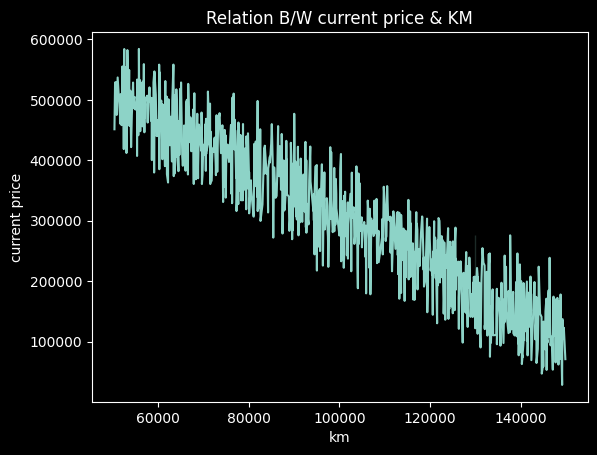

In [31]:
sns.lineplot(x='km',y='current price',data=data)
plt.title("Relation B/W current price & KM")

## Age of cars by year

<AxesSubplot: title={'center': 'Age of cars by year'}, xlabel='years', ylabel='count'>

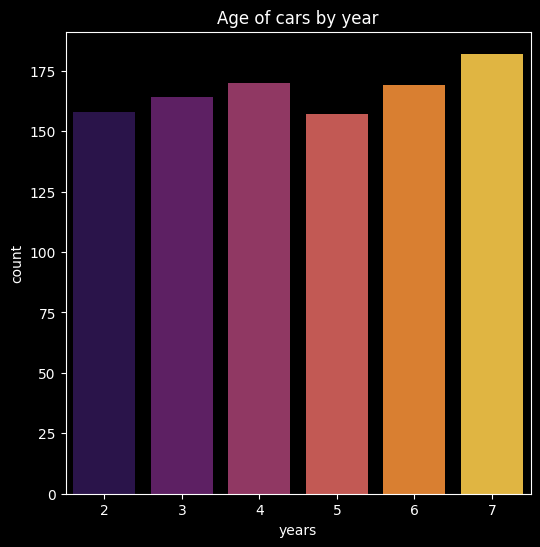

In [32]:
plt.figure(figsize = (6,6))
plt.title("Age of cars by year")
sns.countplot(data['years'],palette='inferno')

## Checking for outliers 

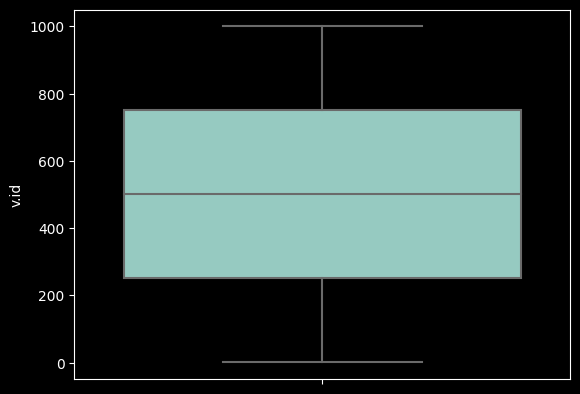

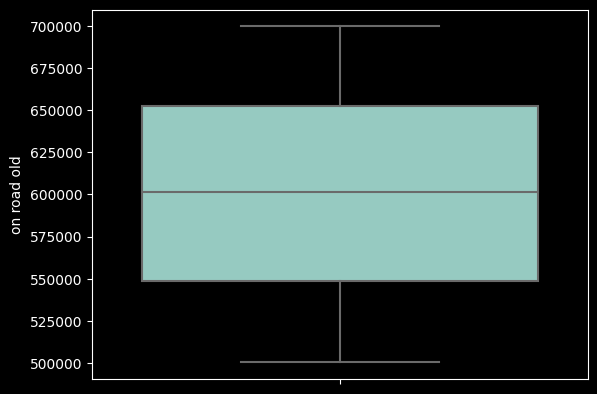

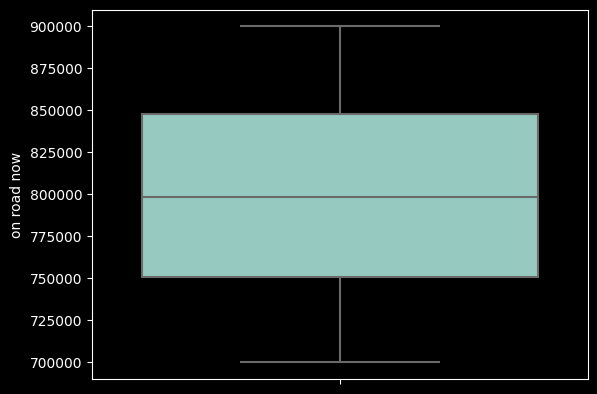

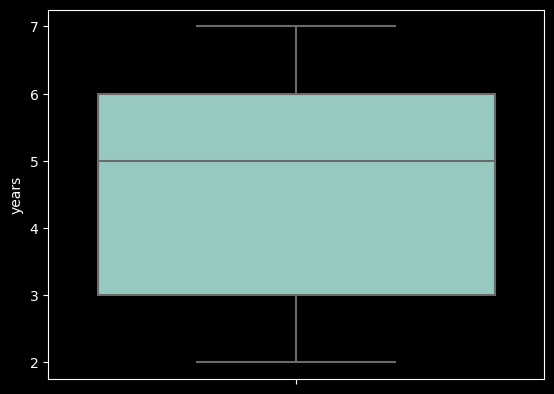

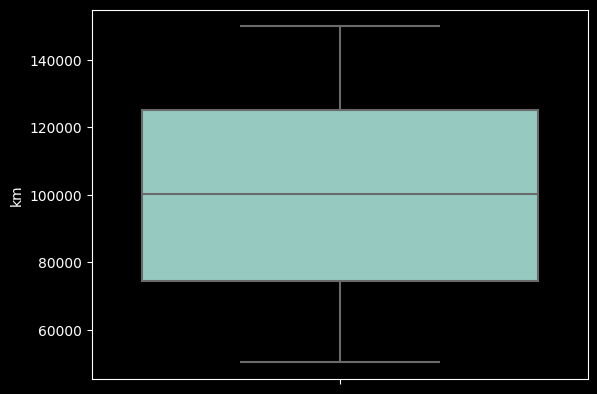

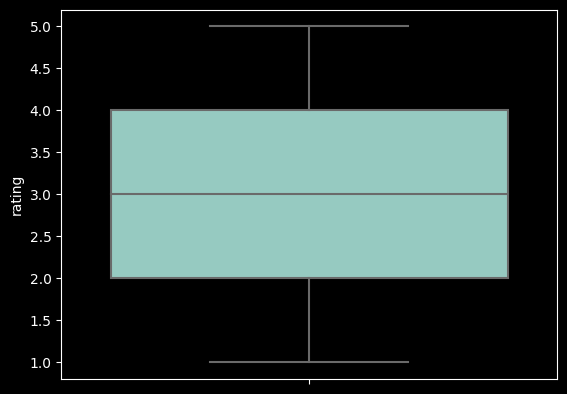

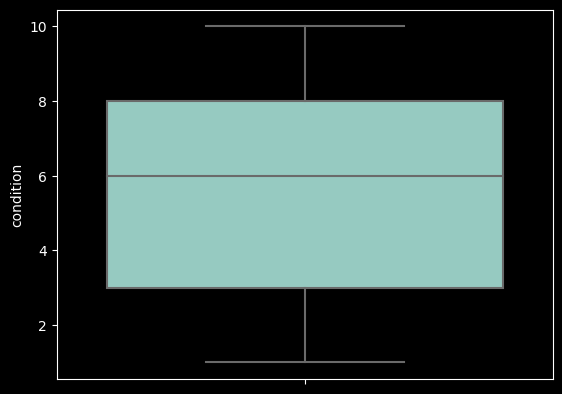

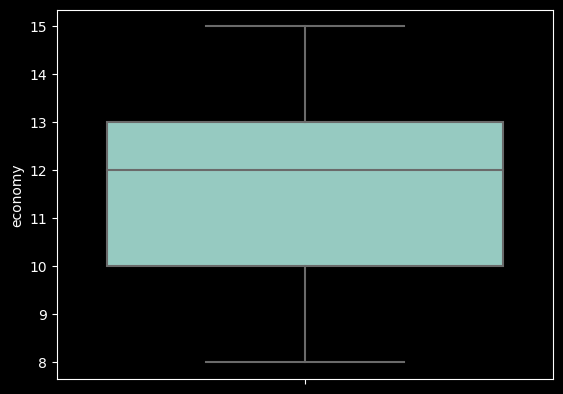

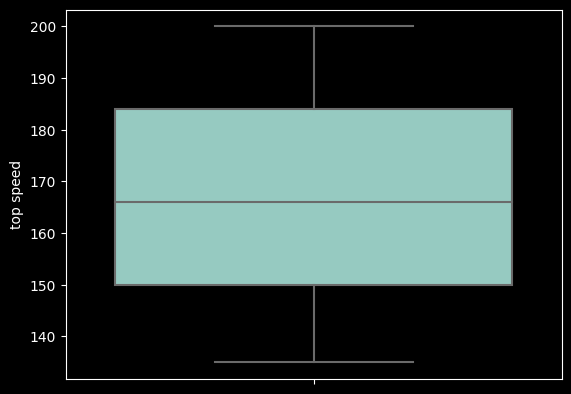

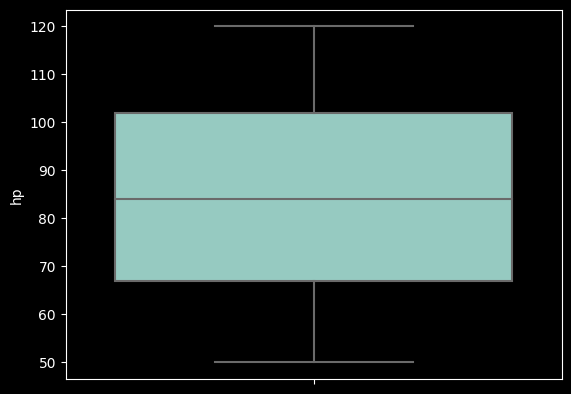

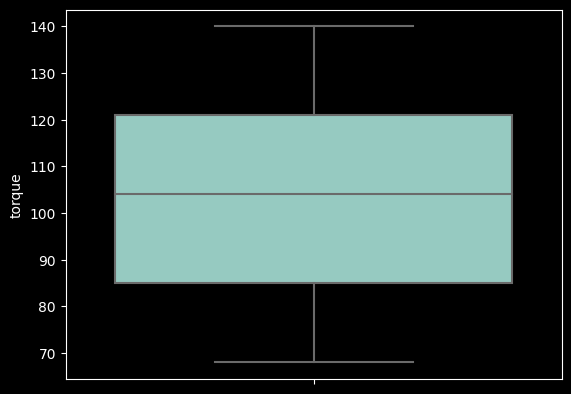

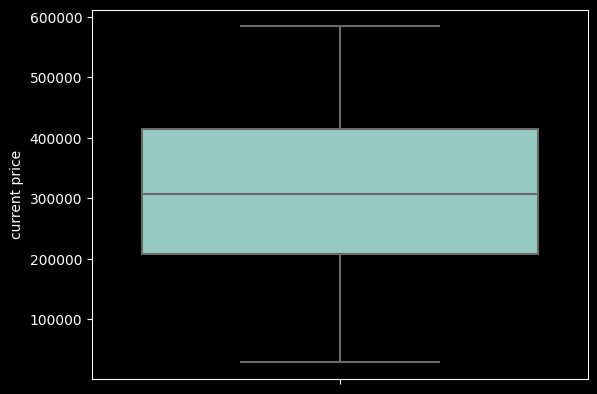

In [10]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

## Finding the correlation 

Text(0.5, 1.0, 'Finding the correlation')

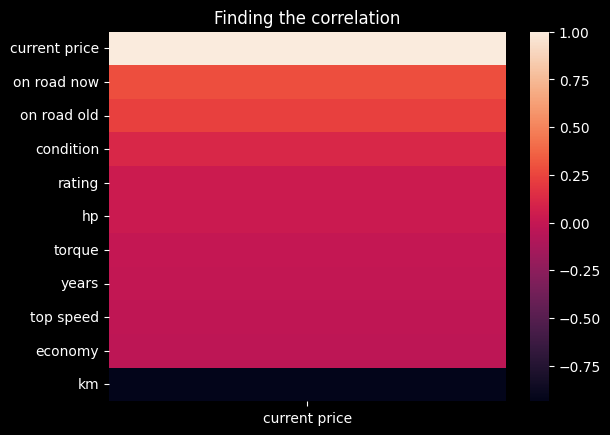

In [33]:
sns.heatmap(data.corr()[['current price']].sort_values(by='current price',ascending=False))
plt.title("Finding the correlation")


## Droping un necessery columns 

In [12]:
data.drop(['v.id'],axis=1,inplace=True)

### KDE plot 

It can help identify the shape of the distribution, such as whether it is symmetric, skewed, or multi-modal, and whether there are any outliers or unusual patterns in the data.

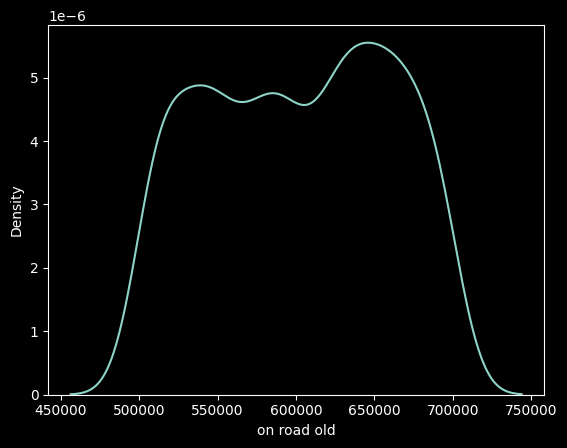

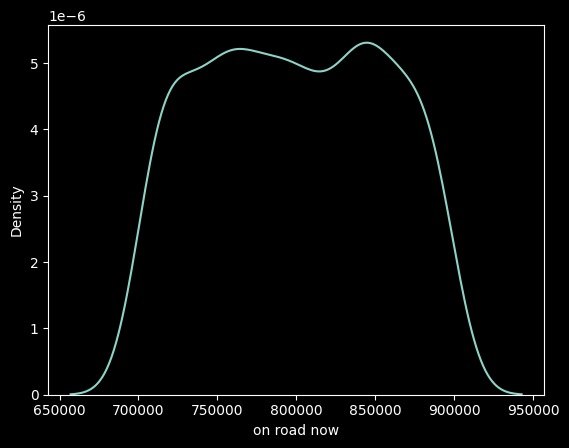

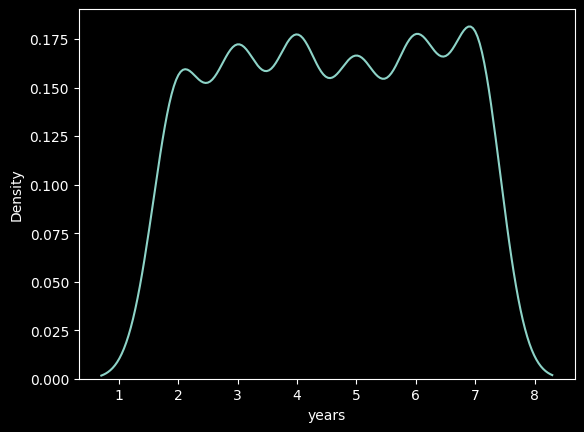

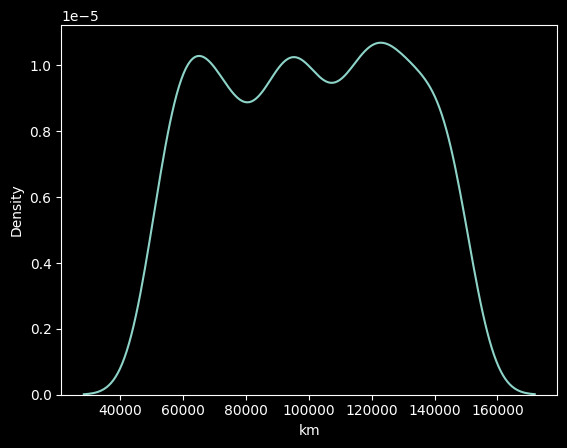

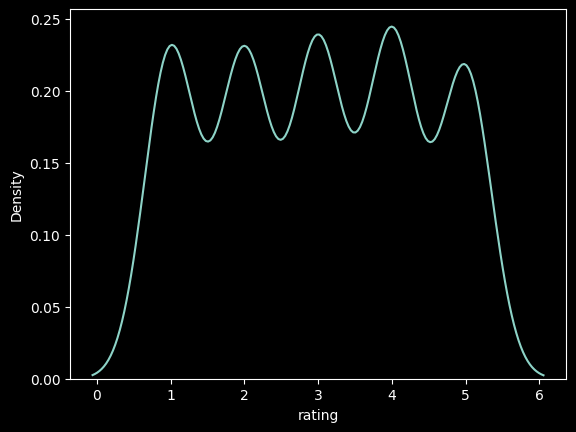

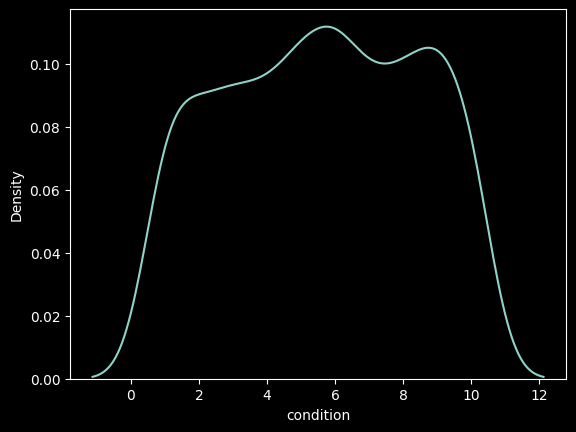

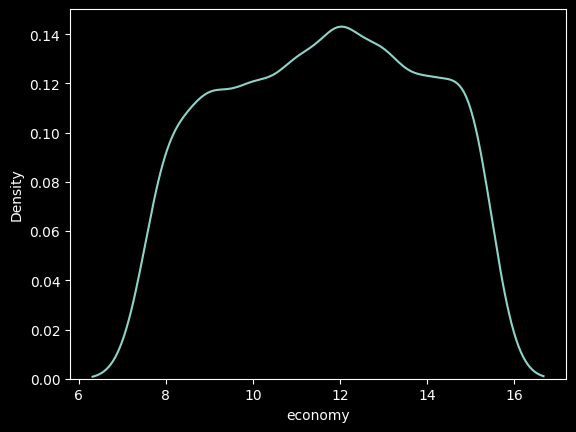

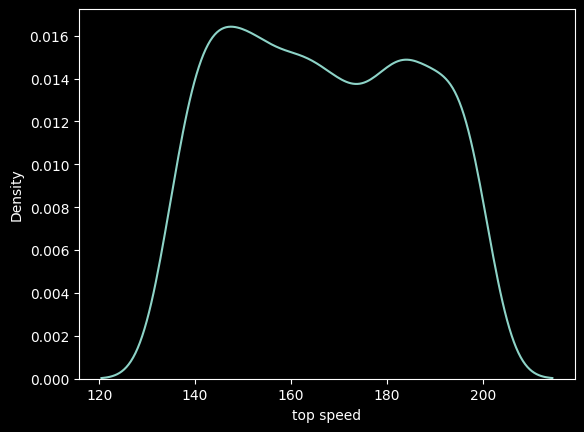

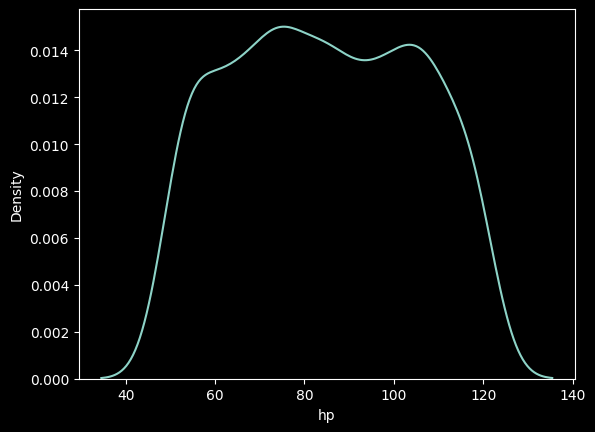

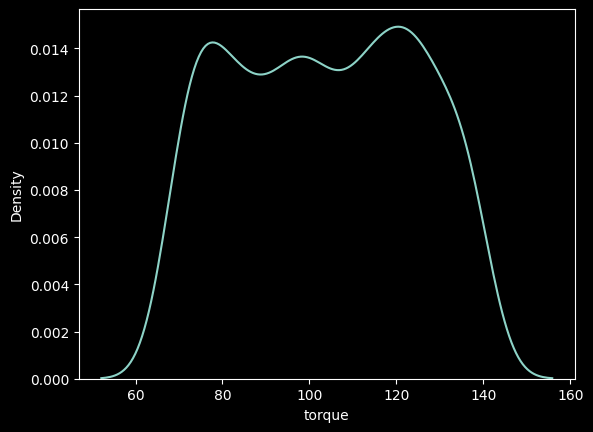

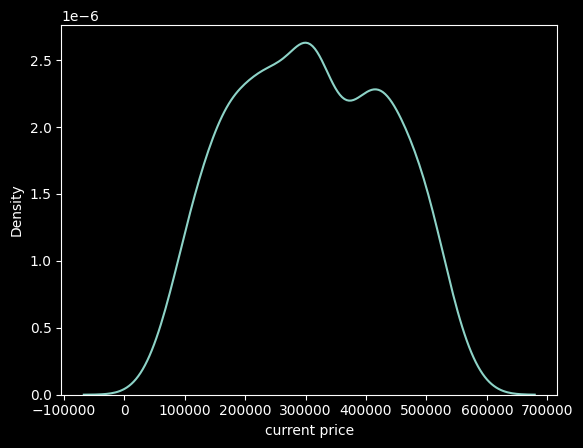

In [13]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.kdeplot(x=data[i])
        plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   on road old    1000 non-null   int64  
 1   on road now    1000 non-null   int64  
 2   years          1000 non-null   int64  
 3   km             1000 non-null   int64  
 4   rating         1000 non-null   int64  
 5   condition      1000 non-null   int64  
 6   economy        1000 non-null   int64  
 7   top speed      1000 non-null   int64  
 8   hp             1000 non-null   int64  
 9   torque         1000 non-null   int64  
 10  current price  1000 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


In [15]:
x=data.iloc[:,:-1].values

In [16]:
x

array([[535651, 798186,      3, ...,    177,     73,    123],
       [591911, 861056,      6, ...,    148,     74,     95],
       [686990, 770762,      2, ...,    181,     53,     97],
       ...,
       [646344, 842733,      7, ...,    196,    113,     89],
       [535559, 732439,      2, ...,    184,    112,    128],
       [590105, 779743,      5, ...,    199,     99,     96]], dtype=int64)

In [18]:
y=data[['current price']].values

## Scaling the data by StandardScaler 

In [19]:
sc=StandardScaler()
x=sc.fit_transform(x)

## Spliting the data set into train data and test data

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2)

## Applying models into the train and test data

In [21]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state=0)}

## Finding the Model Accuracy  

In [22]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2_score",score)
    print("Training_score",training_score)
    print("testing_score",testing_score)
    print("mae",mse)
    print("mse",mse,"\n")
    print("*"*60)

model trained with LinearRegression
r2_score 99.50775526276232
Training_score 99.5220699161447
testing_score 99.50775526276232
mae 75045871.08440652
mse 75045871.08440652 

************************************************************
model trained with Ridge
r2_score 99.50713869114342
Training_score 99.52192160653402
testing_score 99.50713869114342
mae 75139871.38694912
mse 75139871.38694912 

************************************************************
model trained with LinearSVR
r2_score -537.2514245362894
Training_score -616.795707426497
testing_score -537.2514245362894
mae 97153071706.71295
mse 97153071706.71295 

************************************************************
model trained with Lasso
r2_score 99.5077675977515
Training_score 99.52206985205478
testing_score 99.5077675977515
mae 75043990.53609765
mse 75043990.53609765 

************************************************************
model trained with GradientBoostingRegressor
r2_score 99.30700996359813
Training_score 99.

## Taking RandomForestRegressor as our model

RandomForestRegressor: An ensemble model that combines multiple decision trees to predict a continuous target variable.

In [23]:
model=RandomForestRegressor()

## Fitting the train and test data into model

In [24]:
model.fit(x_train,y_train)

RandomForestRegressor()

## prediction 

In [25]:
y_pred=model.predict(x)
output=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)

In [26]:
output.head()

,ACTUAL,PREDICTED
0,351318.0,353763.980
1,285001.5,280361.925
2,215386.0,205449.740
3,244295.5,249230.465
4,531114.5,523906.940


## Visualizing the Actual and Predicted Data

<AxesSubplot: title={'center': 'Model'}, xlabel='ACTUAL', ylabel='PREDICTED'>

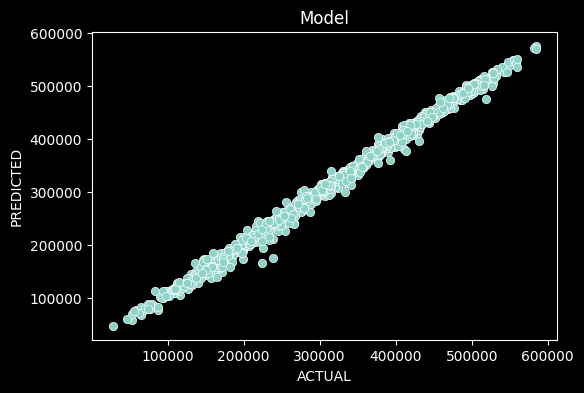

In [29]:
plt.figure(figsize=(6,4))
plt.title("Model")
sns.scatterplot(data=output,x="ACTUAL",y="PREDICTED")

# <center>END